<a id='Introduction'></a>
# Introduction

In Assignment 10 for our class, we looked at the use of Q-Learning (QL) and Deep Reinforcement Learning (DRL) through application to Blackjack (BJ). A Medium article, entitled "Blackjack, Stocks, and Reinforcement Learning: ML for Risk Management" [1] ("the Article") was provided for us to review.  This article and the assignment, while useful for learning, left certain issues unaddressed and the purpose of this project is to better evaluate these algorthms as applied to BJ.

The following issues with the article were noted:
1. The results obtained seem unrealistic. For QL, the author demonstrated a reward per episode of -68/100, or -68%. For DRL, the author demonstrated an expected return of 643%/100 episode, or +6.43% per episode. Blackjack is a well studied game that is believed to have an optimal strategy and these values are not consistent with that prior analysis.  Without counting cards or other cheating methods, optimally played BJ has a player expected value of about -0.5% [3], which implies a house advantage.  Even by counting cards or other cheats,  player EV can only be brought to +1.0% [4].  This implies that the results presented in our assignemnt may have been erroneous.
2. The Open AI Gym BJ environment has some shortcomings for teaching RL.  First, the output of the environment does not reveal player or dealer cards, making understanding the workings of the model challenging.  Second, the environment only offers a simplified game of BlackJack, which does not have Splits, Doubling Down, or Surrenders incorporated.  This simplified model is helpful for implementing RL tests but the missing options reduce the player EV.
3. The assigned article output is challenging to interpret for a few reasons.  First the many images of BJ games are hard to understand and dominate the output.  Second, the author does not compare his alogithms to any baseline, so performance is difficult to interpret.


To address these concerns, I decided to provide the following:
1. Reassessment of QL and DRL in the gym BJ environment, including:
    1. Establish baseline perfomance of a naive and expert strategies.
    1. Compare performance of the Article QL and DRL models to these baselines.
    1. Create new QL and DRL models to see if this performance can be improved.
1. Provide an additional implmentation of BJ, which allows for Double Down, Surrender, and Split actions
    1. Assess performance of naive and expert models in this environment
    1. Train and assess new QL and DRL models in this environment.
1. Provide an analysis of issues with the Article and lessons learned.

Hypotheses:
1. The results presented in the article are incorrect.
2. The results presented in the article can be improved upon with better models.
3. For blackjack, QL models will perform better than DRL models
4. AI models can approach but not exceed the performance of expert models in Blackjack.



# 6D Analysis

## Decomposition

Decomposition of the BJ problem addressed herein is the nature of the project.  I started by reducing the propblem to the simple game of blackjack in gym and then progressed to more complex models.  Additioanlly, by reducing QL and DRL models to  human interpretable strategy,  this allows one a closer look inside the "black box", with more insights as to where the a model is going wrong potentially available.

## Domain Expertise

There is a great deal of content published on expert blackjack strategies[5, 6]. Fr this analysis, this [strategy](https://en.wikipedia.org/wiki/Blackjack#Blackjack_strategy) was chosen as the expert to be used.  Other choices are available, but the gain in reward is likely very small and beyond the scope of this discussion.

[test](#Introduction)

## Data

Data for this project comes from the game itself.  No external sources were required.

## Design



## Diagnosis

One purpose of this project is diagnosis of the issues with the assigned article.  Comparision to Expert and naive baselines will allow for detection of

## Deployment

Although beyond the scope of this article, deployment of this model could be performed by allowing outside users to find optimal plays

# Notebook Setup

In [4]:
import warnings
warnings.filterwarnings(action ='ignore', category=DeprecationWarning)

import pandas as pd
import gym
import strategies

import gym_utils
env = gym.make('Blackjack-v1')


# Analysis in the Gym environment

## Naive and Expert Strategy Assessment

We begin by assessing performance of the naive (random action choice) and expert models.  This baseline is important for further analysis as it represents the worst case model and barrier above which we do not outperformance.  This shows the naive strategy has an expected return of -40% and the expert strategy about -5%.  The expert strategy deos not perform as well as the literature reports due to the absence of double, surrender, and split actions.

In [45]:
models = {'naive': 'random',
          'expert': strategies.BASIC_STRATEGY_HIT_STAND_ONLY}
df, results = gym_utils.evaluate_strategies(env, models)
df

,score,ER
naive,NaN,-40.66
expert,100.0,-5.24


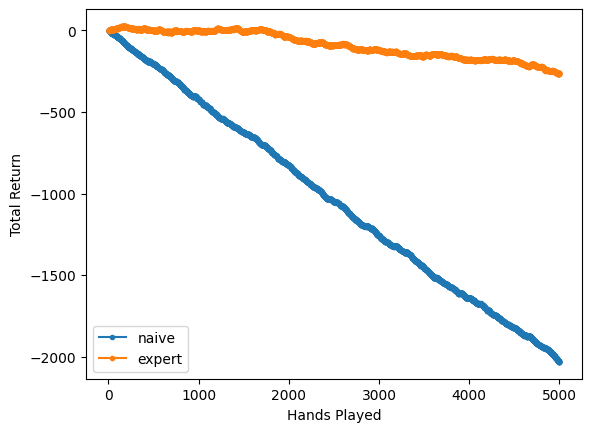

In [46]:
# Plot results over Time
gym_utils.plot_results(results)

In [50]:
# Display Expert Strategy
expert_strategy = strategies.BASIC_STRATEGY_HIT_STAND_ONLY
expert_strategy

,2,3,4,5,6,7,8,9,T,A
S21,S,S,S,S,S,S,S,S,S,S
S20,S,S,S,S,S,S,S,S,S,S
S19,S,S,S,S,S,S,S,S,S,S
S18,S,S,S,S,S,S,S,H,H,H
S17,H,H,H,H,H,H,H,H,H,H
S16,H,H,H,H,H,H,H,H,H,H
S15,H,H,H,H,H,H,H,H,H,H
S14,H,H,H,H,H,H,H,H,H,H
S13,H,H,H,H,H,H,H,H,H,H
S12,H,H,H,H,H,H,H,H,H,H


## Assessment of McGuire models

The McGurie article reports exceptional results for its models.  To verify these results, the code from the Article was run and the outputs (Q table and Deep Q Network) were converted to Blackjack Strategies.  The source code can be found in the files mcguire_qlearn.py and mcguire_dqn.py, and a script to run this code is in mcguire_train.py.  The output of mcguire_train produces the strategies imported below.

### McGuire Q-Learning Strategy

The Q learning strategy for the Article is show in the dataframe below.  It differes from and optimal strategy in a few ways, for the most part it is more aggressive than the expert strategy, with actions of hit being displayed for soft 20 and below as well as for Hard 17 and below.

In [48]:
# Q Learning strategy
mcguire_qlearn_strategy = pd.read_pickle('TrainedStrategies/mcguire_Q_strategy.pkl')
mcguire_qlearn_strategy

,2,3,4,5,6,7,8,9,T,A
S21,S,S,S,S,S,S,S,S,S,S
S20,H,H,H,H,H,H,H,H,H,H
S19,H,H,H,H,H,H,H,H,H,H
S18,H,H,H,H,H,H,H,H,H,H
S17,H,H,H,H,H,H,H,H,H,H
S16,H,H,H,H,H,H,H,H,H,H
S15,H,H,H,H,H,H,H,H,H,H
S14,H,H,H,H,H,H,H,H,H,H
S13,H,H,H,H,H,H,H,H,H,H
S12,H,H,H,H,H,H,H,H,H,H


### McGuire DRL Strategy

The DRL strategy from the article was also determined and dsiplayed below. It is also quite different than the expert strategy, going so far as to show Hit for a Soft 21 and Stand for values below Hard 10, all very unwise from a practical point of view.

In [53]:
# Article DRL Strategy
mcguire_drl_strategy = pd.read_pickle('TrainedStrategies/mcguire_DQN_strategy.pkl')
mcguire_drl_strategy

,2,3,4,5,6,7,8,9,T,A
S21,S,S,S,S,S,S,H,H,H,S
S20,H,H,H,H,H,H,H,H,H,H
S19,H,H,H,H,H,H,H,H,H,H
S18,H,H,H,H,H,H,H,H,H,H
S17,H,H,H,H,H,H,H,H,H,H
S16,H,H,H,H,H,H,H,H,H,H
S15,H,H,H,H,H,H,H,H,H,H
S14,H,H,H,H,H,H,H,H,H,H
S13,H,H,H,H,H,H,H,H,H,H
S12,H,H,H,H,H,H,H,H,H,H


## Article strategy performance
 Below are performance data and a graph comparing the naive and expert strategies to those from the article.  This shows that the Article strategies outperform the naive strategy but underperform relative to the expert.  As before, the "score" is the percentage of actions in the strategy that are the same as the expert and the "ER" is the Expected Return of the strategy as a percentage.

In [54]:
# Article performance assessment
models = {'mcguire_qlearn': mcguire_qlearn_strategy,
          'mcguire_drl': mcguire_drl_strategy,
          'expert': strategies.BASIC_STRATEGY_HIT_STAND_ONLY,
          'naive': 'random',}
df, results = gym_utils.evaluate_strategies(env, models)
df

,score,ER
mcguire_qlearn,75.714286,-23.64
mcguire_drl,61.785714,-17.38
expert,100.000000,-3.92
naive,NaN,-39.38


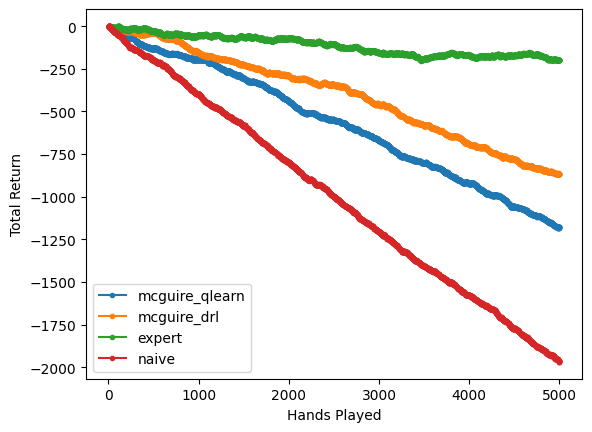

In [55]:
# Article perfomance graph
gym_utils.plot_results(results)

# Q Learning and DRL Implementation

As a next step, I created a new Q-learning model from scratch tht can be found in `rose_qlearn_gym.py`.  This model was tuned and trained externally with the performance as noted below.  Several important changes were made from the article and are outlined in the findings.  The performance of the new model was much improved as shown below. Additionally, the straegy chart is better aligned with the expert strategy as shown by the improved strategy score.

A new DRL model was also created trained and tuned to showed improved performance.

In [57]:
# Display Q Learning Strategy
rose_qlearn_gym_strategy = pd.read_pickle('TrainedStrategies/rose_qlearn_gym_strategy.pkl')
rose_qlearn_gym_strategy

,2,3,4,5,6,7,8,9,T,A
S21,S,S,S,S,S,S,S,S,S,S
S20,S,S,S,S,S,S,S,S,S,S
S19,S,S,S,S,S,S,S,H,H,S
S18,S,H,H,H,S,S,H,H,S,S
S17,H,H,H,H,S,H,H,H,H,H
S16,S,H,H,S,H,H,H,H,H,H
S15,H,H,H,H,H,H,H,H,H,H
S14,H,H,S,H,H,H,H,H,H,H
S13,S,H,H,S,H,H,H,H,H,H
S12,H,H,H,H,H,H,H,H,H,H


In [59]:
# Display DRL Strategy
rose_dqn_gym_strategy = pd.read_pickle('TrainedStrategies/rose_dqn_gym_strategy.pkl')
rose_dqn_gym_strategy

,2,3,4,5,6,7,8,9,T,A
S21,S,S,S,S,S,S,S,S,S,S
S20,S,S,S,S,S,S,S,S,S,S
S19,S,S,S,S,S,S,S,H,H,S
S18,S,S,S,S,S,S,H,H,H,S
S17,S,S,S,S,H,H,H,H,H,S
S16,S,S,S,H,H,H,H,H,H,S
S15,S,S,H,H,H,H,H,H,H,S
S14,S,H,H,H,H,H,H,H,H,S
S13,S,H,H,H,H,H,H,H,H,S
S12,S,H,H,H,H,H,H,H,H,S


In [64]:
models = {'expert': strategies.BASIC_STRATEGY_HIT_STAND_ONLY,
          'rose_qlearn': rose_qlearn_gym_strategy,
          'rose_dqn': rose_dqn_gym_strategy,
          'mcguire_qlearn': mcguire_qlearn_strategy,
          'mcguire_drl': mcguire_drl_strategy,
          'naive': 'random',}
df, results = gym_utils.evaluate_strategies(env, models)
df

,score,ER
expert,100.000000,-5.22
rose_qlearn,86.428571,-6.48
rose_dqn,82.500000,-8.36
mcguire_qlearn,75.714286,-22.50
mcguire_drl,61.785714,-18.10
naive,NaN,-38.56


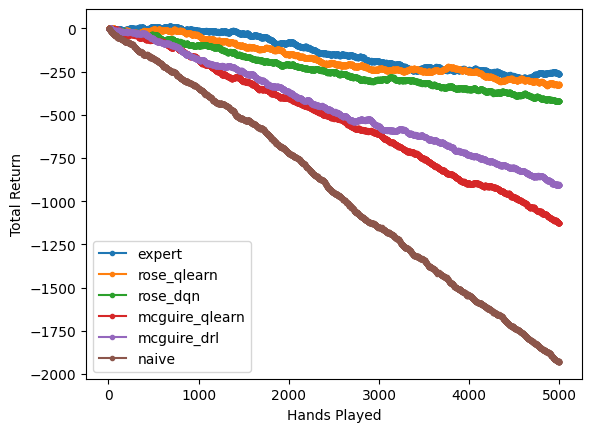

In [65]:
gym_utils.plot_results(results)

# Analysis



# Future Work

<a id='References'></a>
# References

1. https://towardsdatascience.com/playing-blackjack-using-model-free-reinforcement-learning-in-google-colab-aa2041a2c13d
1. https://trevormcguire.medium.com/blackjack-stocks-and-reinforcement-learning-ea4014115aeb
1. Baldwin, Roger R. et al. “The Optimum Strategy in Blackjack.” Journal of the American Statistical Association 51 (1956): 429-439.
2. https://wizardofodds.com/games/blackjack/card-counting/introduction/
3. https://en.wikipedia.org/wiki/Blackjack#Blackjack_strategy
4. Lapan, M. (2020). Deep reinforcement learning hands-on: Apply modern Rl methods to practical problems of Chatbots, robotics, discrete optimization, web automation, and more. Packt.
